In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from pathlib import Path
import sys
sys.path.append(str(Path.cwd() / "_scripts"))

In [33]:
import seaborn as sns
import seaborn.objects as so
import polars as pl
import numpy as np

from setup.data_wrangle import *
from setup.setup import *
from analysis.analysis import *


In [5]:
# create_cases(AIRBOUNDARY_FOLDER)

In [6]:
cases = retrieve_cases(AIRBOUNDARY_FOLDER)
sc = cases[0]
sc

CaseData(case_name='amb_b1', idf=<geomeppy.idf.IDF object at 0x107bbc3a0>, sql=Energy SQLiteResult: /Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/airboundary/case_amb_b1/results/eplusout.sql, path_to_input=PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/svg2plan/outputs2/case_amb_b1'), path_to_output=PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/airboundary/case_amb_b1'))

In [54]:
df_vol = create_zone_vol_df_many(cases)
df_vol.head(1)

case_names,space_names,datetimes,qoi,values,qoi_0,values_0,qoi_1,values_1
str,str,datetime[μs],str,f64,str,f64,str,f64
"""amb_b1""","""BLOCK 00 STOREY 0""",2017-07-01 00:00:00,"""AFN Zone Ventilation Volume""",143.226488,"""AFN Zone Mixing Volume""",49.152433,"""Zone Mean Air Temperature""",20.294237


Text(0.5, 0, 'AFN Zone Ventilation Volume [m3]')

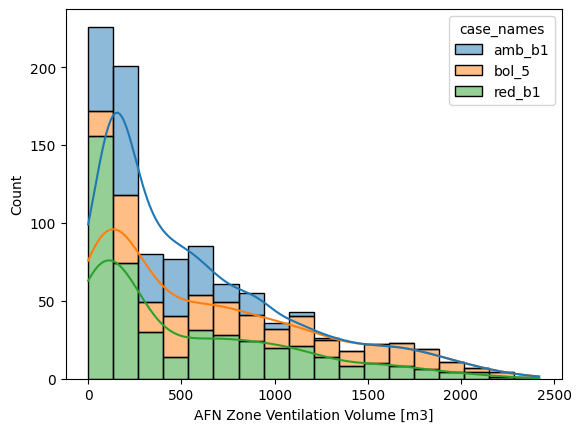

In [12]:
# vent - no 0s 
values = "values"
qoi = "qoi"
df_filter = df_vol.filter(pl.col(values) > 0)

df = df_filter
g = sns.histplot(df, x=values,  hue="case_names", kde=True, multiple="stack")

_, qoi_info = get_plot_labels(sc, df_vol[qoi][0])
g.set_xlabel(qoi_info)

Text(0.5, 0, 'AFN Zone Mixing Volume [m3]')

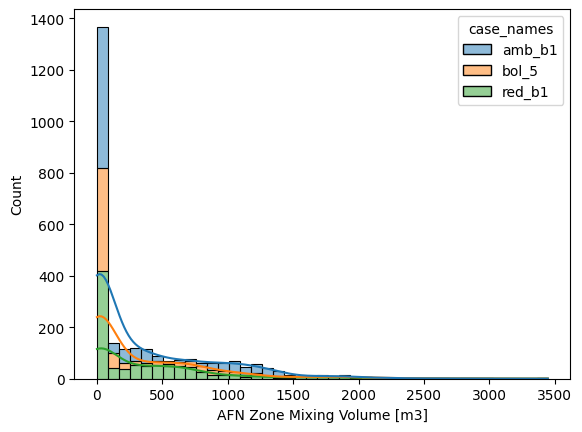

In [14]:
values = "values_0"
qoi = "qoi_0"
df_filter = df_vol.filter(pl.col(values) > 0)

df = df_vol
g = sns.histplot(df, x=values,  hue="case_names", kde=True, multiple="stack")

_, qoi_info = get_plot_labels(sc, df[qoi][0])
g.set_xlabel(qoi_info)

## Key Takeaways

Text(0.5, 0, 'Mixing + Ventilation Volume [m3]')

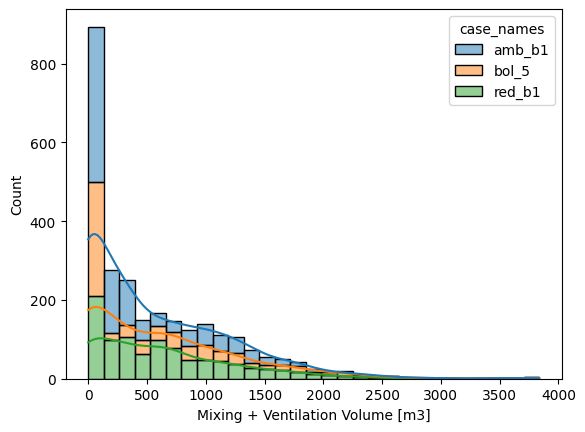

In [20]:
# combination 
df_vol2 = df_vol.with_columns(combined_vent =pl.col("values") + pl.col("values_0"))
df_vol2.head()

values = "combined_vent"
qoi = "qoi_0"
df_filter = df_vol2.filter(pl.col(values) > 0)

df = df_vol2
g = sns.histplot(df, x=values,  hue="case_names", kde=True, multiple="stack")

_, qoi_info = get_plot_labels(sc, df[qoi][0], "Mixing + Ventilation Volume")
g.set_xlabel(qoi_info)

Text(0.5, 0, 'Zone Mean Air Temperature [C]')

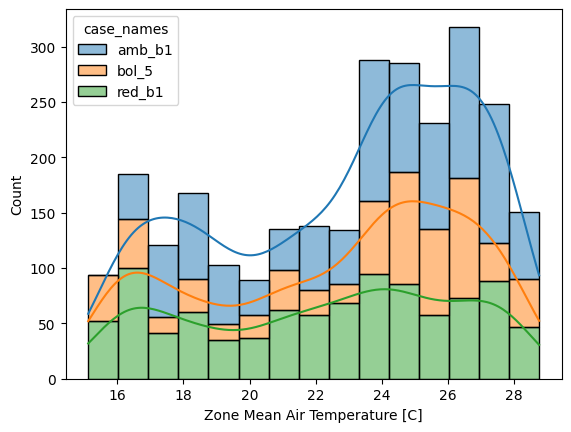

In [18]:
values = "values_1"
qoi = "qoi_1"
df_filter = df_vol.filter(pl.col(values) > 0)

df = df_vol
g = sns.histplot(df, x=values,  hue="case_names", kde=True, multiple="stack")

_, qoi_info = get_plot_labels(sc, df[qoi][0])
g.set_xlabel(qoi_info)

In [31]:
df_agg = df_vol2.group_by("case_names").agg([pl.mean("combined_vent"), pl.mean("values_1").alias("temp")])
df_agg

case_names,combined_vent,temp
str,f64,f64
"""bol_5""",607.306238,23.218358
"""amb_b1""",450.426881,23.410863
"""red_b1""",636.902829,22.243603


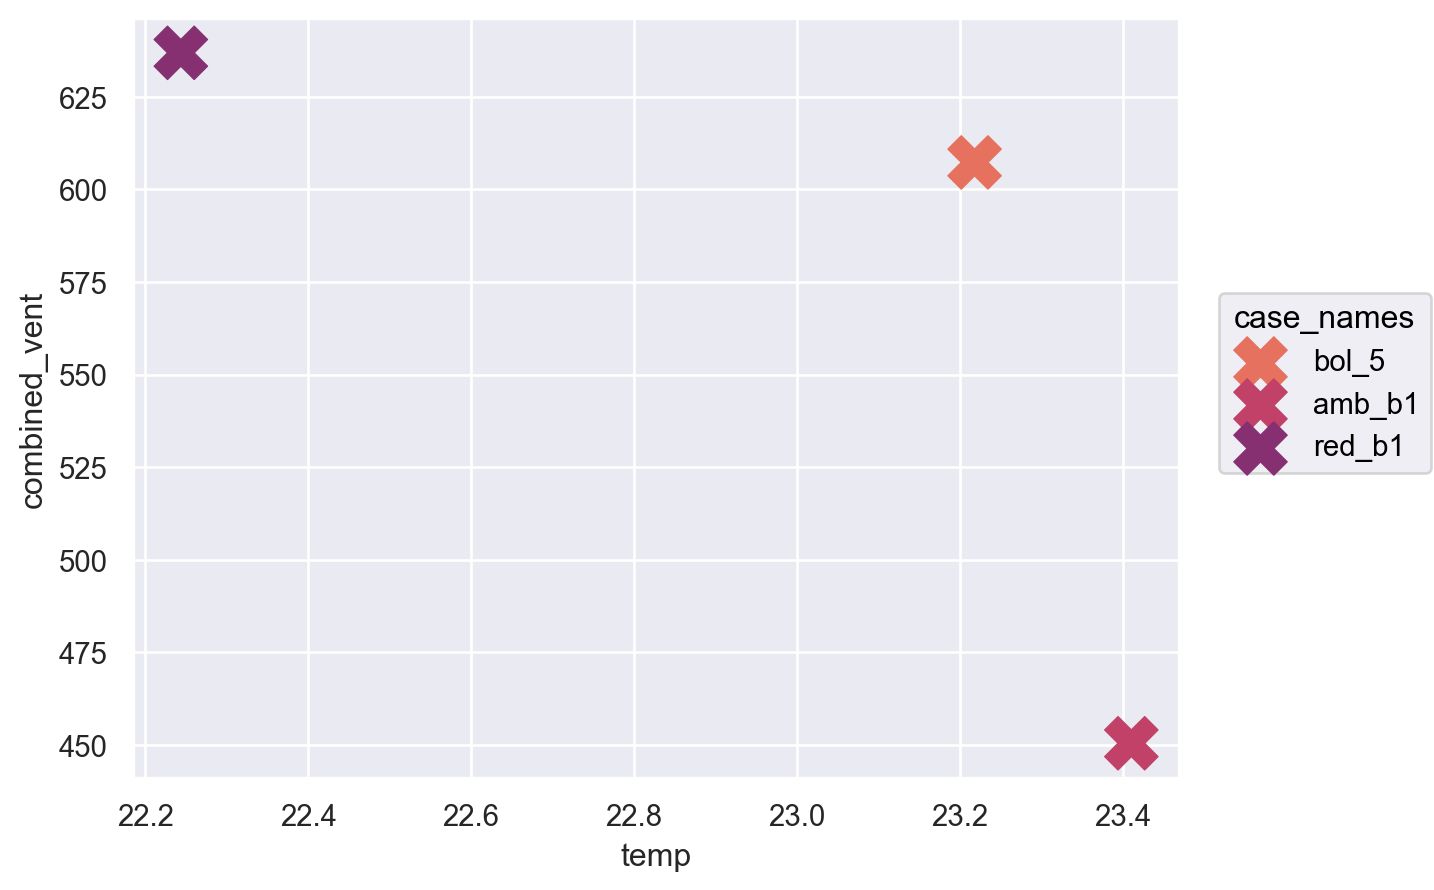

In [52]:
(so.Plot(df_agg, x="temp", y="combined_vent", color="case_names" ).add(so.Dot(pointsize=20, marker="X")).scale(color="flare"))

In [48]:
# room by room breakdown? 
# (so.Plot(df_vol2, x="values_1", y="combined_vent", color="case_names" ).add(so.Dot(pointsize=4, alpha=0.8)))